## Bank Marketing Dataset

##### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
#Here, I'm going to use bank_addition_full.csv dataset because it contains the all information 
#what ever required
#Further I'll check the same bank_full.csv using the same model what I will prepare for the this dataset
#If both the dataset works similar then I confirmed that the features that are choosen by the admin is right at all

In [2]:
#import dependencies
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from collections import Counter

In [4]:
%matplotlib inline

In [5]:
plt.style.use('ggplot')
sns.set_color_codes(palette= 'muted')
sns.set(style= 'ticks', color_codes= True)

pd.options.display.max_columns= 199
pd.options.display.max_rows= 500

In [6]:
path= 'C://Users//sngupta//Documents//hackerearthhackathon//american_express_hiring_challenge//bank_management_data//'

In [7]:
df= pd.read_csv(path+'bank_additional//bank-additional-full.csv', sep= ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.shape

(41188, 21)

In [10]:
bank_data= pd.read_csv(path+'bank//bank-full.csv', sep= ';')
bank_data.shape

(45211, 17)

In [11]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
#Information of the bank additional full dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [13]:
#Description of the bank additional full dataset
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Features Used
Input variables:
#### bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Univariate Analysis

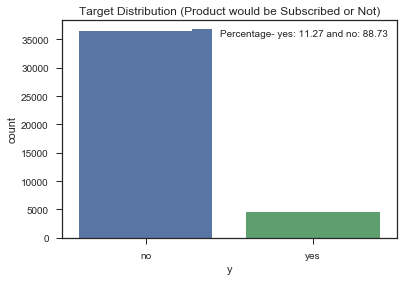

In [14]:
#Check the target variable
sns.countplot(df['y'])
plt.title('Target Distribution (Product would be Subscribed or Not)')
plt.legend(['Percentage- yes: {:.2f} and no: {:.2f}' .format(df['y'].value_counts(normalize= True)[1]*100, 
                                                             df['y'].value_counts(normalize= True)[0]*100)], loc= 'best')
plt.show()

In [15]:
#From the graph we can clearly say that it is the case of imbalanced class classification based problem

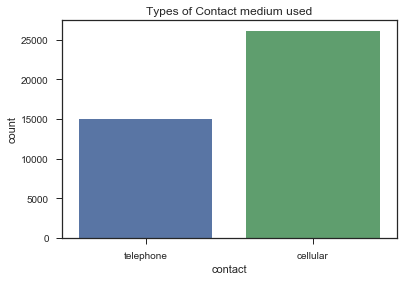

In [16]:
#Contact information
sns.countplot(df['contact'])
plt.title('Types of Contact medium used')
plt.show()

In [17]:
#Mostly used cellular to contact

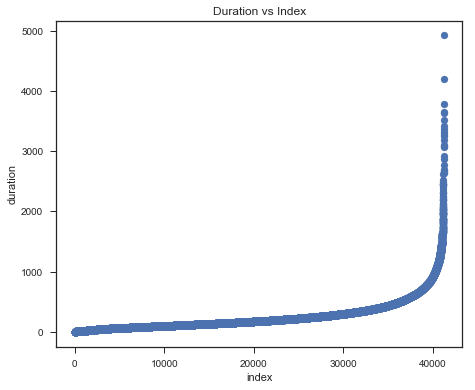

In [18]:
#Flow of balance and duration according to the  according to the index
plt.figure(figsize= (16, 6))
plt.subplot(121)
plt.scatter(df.index, df['duration'].sort_values())
plt.title('Duration vs Index')
plt.xlabel('index')
plt.ylabel('duration')
plt.show()

In [19]:
#In case of duration the some point act like outliers but check further

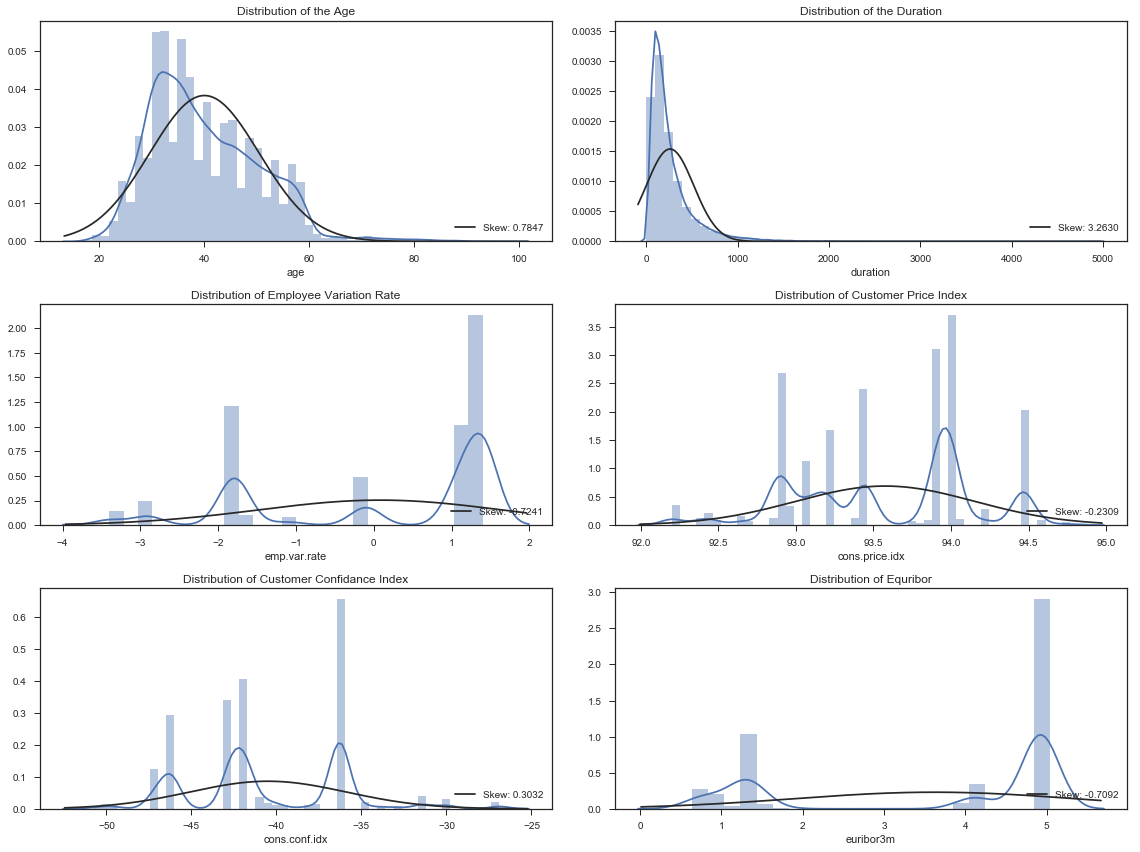

In [20]:
#Checkout the distribution of balance, duration
plt.figure(figsize= (16, 12))
plt.subplot(321)
sns.distplot(df['age'], fit= st.norm, norm_hist= True)
skew= st.skew(df['age'])
plt.legend(['Skew: {:.4f}' .format(skew)], loc= 4)
plt.title('Distribution of the Age')

plt.subplot(322)
sns.distplot(df['duration'], fit= st.norm, norm_hist= True)
skew= st.skew(df['duration'])
plt.legend(['Skew: {:.4f}' .format(skew)], loc= 4)
plt.title('Distribution of the Duration')

plt.subplot(323)
sns.distplot(df['emp.var.rate'], fit= st.norm, norm_hist= True)
skew= st.skew(df['emp.var.rate'])
plt.legend(['Skew: {:.4f}' .format(skew)], loc= 4)
plt.title('Distribution of Employee Variation Rate')

plt.subplot(324)
sns.distplot(df['cons.price.idx'], fit= st.norm, norm_hist= True)
skew= st.skew(df['cons.price.idx'])
plt.legend(['Skew: {:.4f}' .format(skew)], loc= 4)
plt.title('Distribution of Customer Price Index')

plt.subplot(325)
sns.distplot(df['cons.conf.idx'], fit= st.norm, norm_hist= True)
skew= st.skew(df['cons.conf.idx'])
plt.legend(['Skew: {:.4f}' .format(skew)], loc= 4)
plt.title('Distribution of Customer Confidance Index')

plt.subplot(326)
sns.distplot(df['euribor3m'], fit= st.norm, norm_hist= True)
skew= st.skew(df['euribor3m'])
plt.legend(['Skew: {:.4f}' .format(skew)], loc= 4)
plt.title('Distribution of Equribor')

plt.tight_layout()
plt.show()

In [21]:
#Check the countplot of the categorical type features to show how dominant the elements are
cat_feat_to_plot= [col for col in df.columns if df[col].dtypes== 'O']

In [22]:
cat_feat_to_plot.remove('y')

In [23]:
len(cat_feat_to_plot)

10

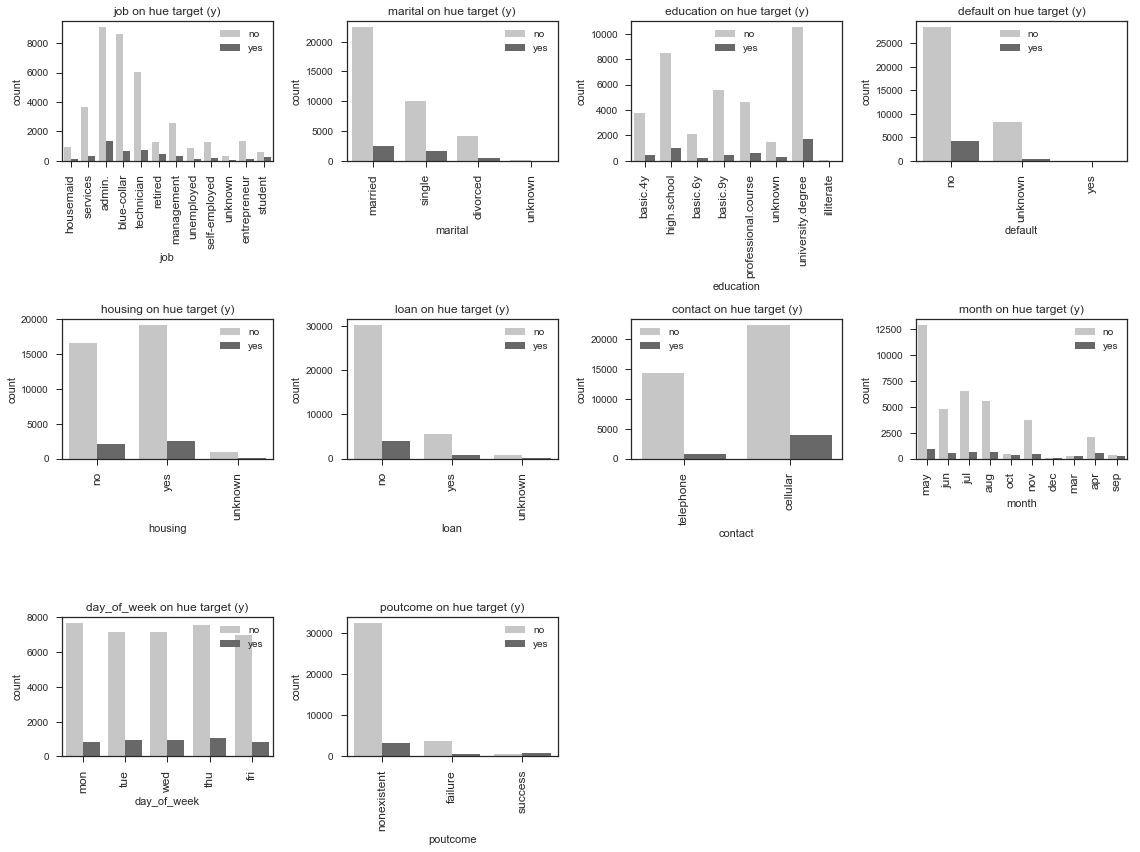

In [24]:
#Now plotting
plt.figure(figsize= (16, 12))
for i, col in enumerate(cat_feat_to_plot):
    plt.subplot(3,4,i+1)
    sns.countplot(col, data= df, hue= 'y', palette= 'Greys')
    plt.title(col+' on hue target (y)', size= 12)
    plt.legend(loc= 'best')
    plt.xticks(rotation= 90, size= 12)
plt.tight_layout()
plt.show()

In [25]:
#From the above you come to know that how actually the element of the features play important Role in getting the product subscription or not
#In case of Job the most of the subcription given to the admin among the others
#See, how education is imporatant the most of the subscription given to the university degree holder but on the other hand you see the 
#illetrates are not getting subscription (How important the education is?)
#Cellular user getting more subscrition than others
#And the loan term customer depends on the reapayment of the loan, those who repayed get subscription otherwise not

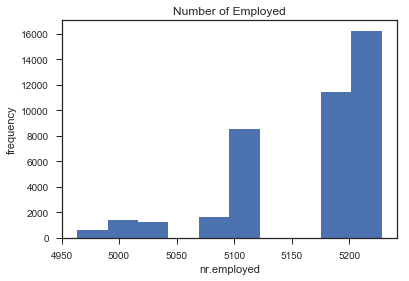

In [26]:
plt.hist(df['nr.employed'])
plt.xlabel('nr.employed')
plt.ylabel('frequency')
plt.title('Number of Employed')
plt.show()

### Bivariate Analysis

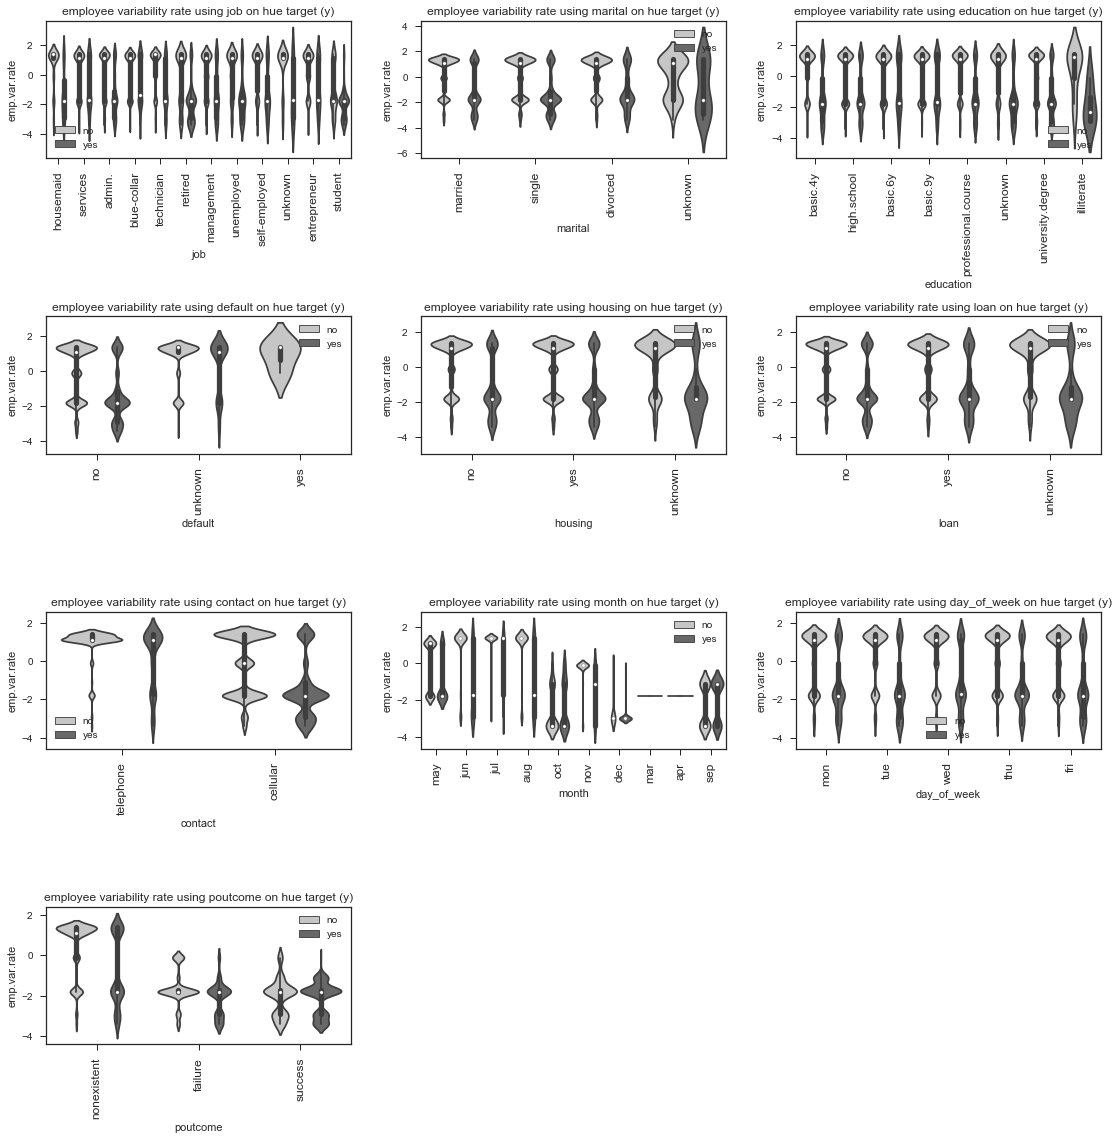

In [27]:
#How does the different numerical features varies according to the target variable
plt.figure(figsize= (16, 16))
for i, col in enumerate(cat_feat_to_plot):
    plt.subplot(4,3,i+1)
    sns.violinplot(col, 'emp.var.rate', data= df, hue= 'y', palette= 'Greys')
    plt.title('employee variability rate using '+col+' on hue target (y)', size= 12)
    plt.legend(loc= 'best')
    plt.xticks(rotation= 90, size= 12)
plt.tight_layout()
plt.show()

In [28]:
#According to the graph the employee variability rate of those who are getting subscription is less as comparison to the who are not getting 
#the subscription

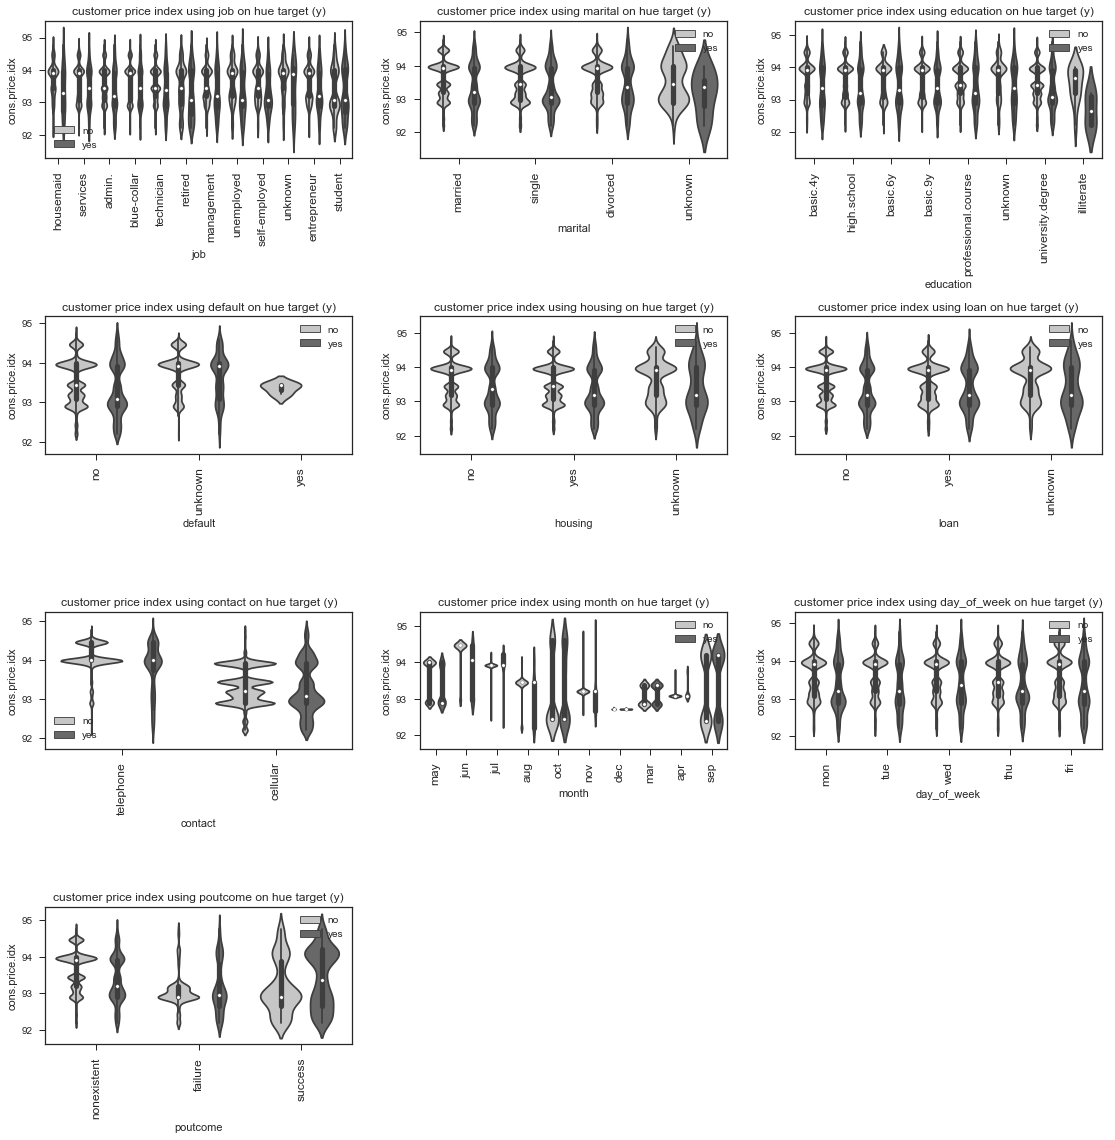

In [29]:
plt.figure(figsize= (16, 16))
for i, col in enumerate(cat_feat_to_plot):
    plt.subplot(4,3,i+1)
    sns.violinplot(col, 'cons.price.idx', data= df, hue= 'y', palette= 'Greys')
    plt.title('customer price index using '+col+' on hue target (y)', size= 12)
    plt.legend(loc= 'best')
    plt.xticks(rotation= 90, size= 12)
plt.tight_layout()
plt.show()

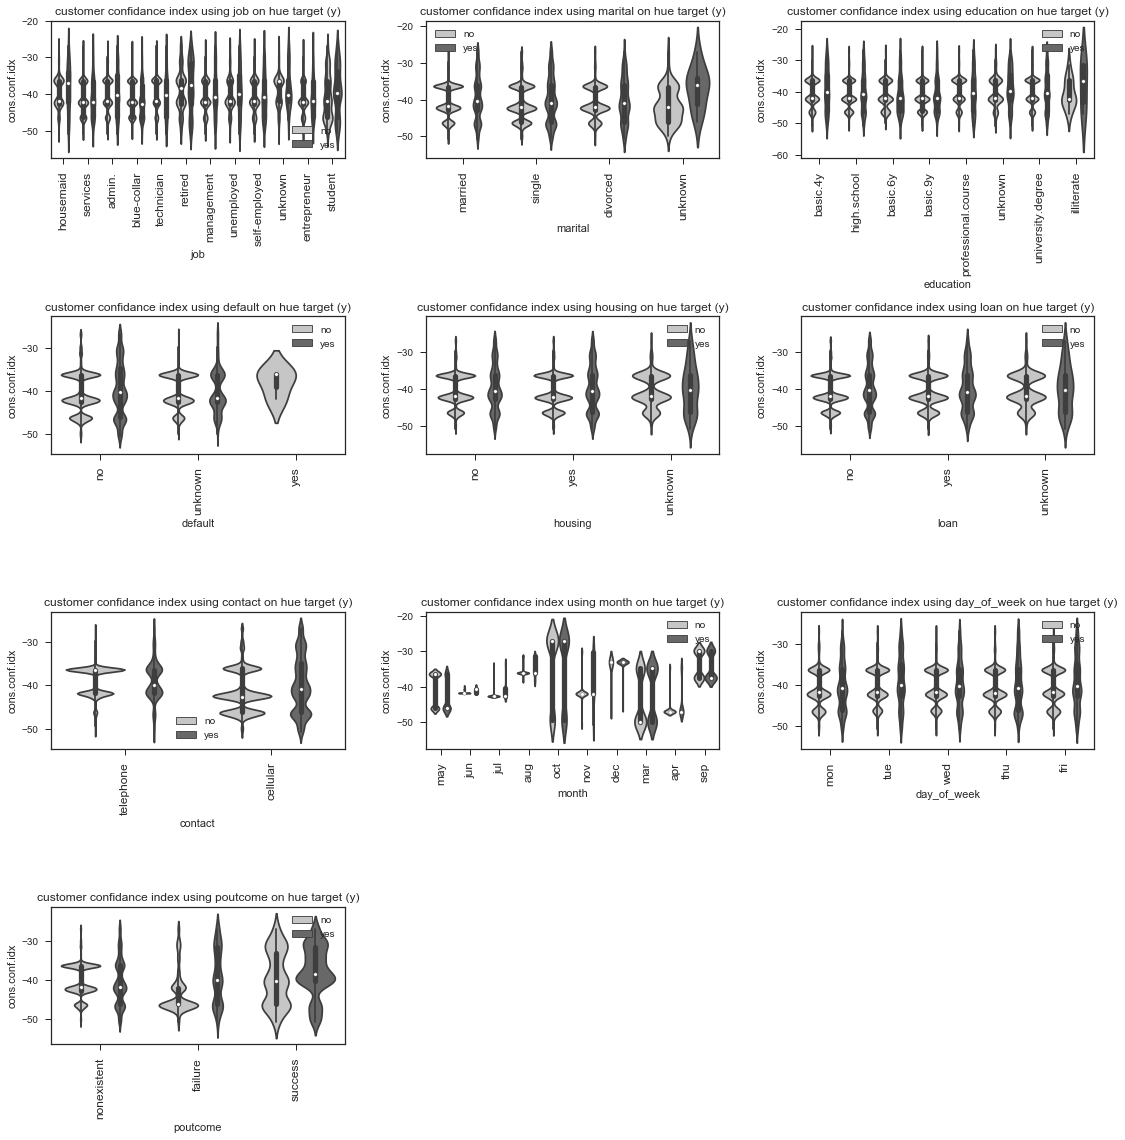

In [30]:
plt.figure(figsize= (16, 16))
for i, col in enumerate(cat_feat_to_plot):
    plt.subplot(4,3,i+1)
    sns.violinplot(col, 'cons.conf.idx', data= df, hue= 'y', palette= 'Greys')
    plt.title('customer confidance index using '+col+' on hue target (y)', size= 12)
    plt.legend(loc= 'best')
    plt.xticks(rotation= 90, size= 12)
plt.tight_layout()
plt.show()

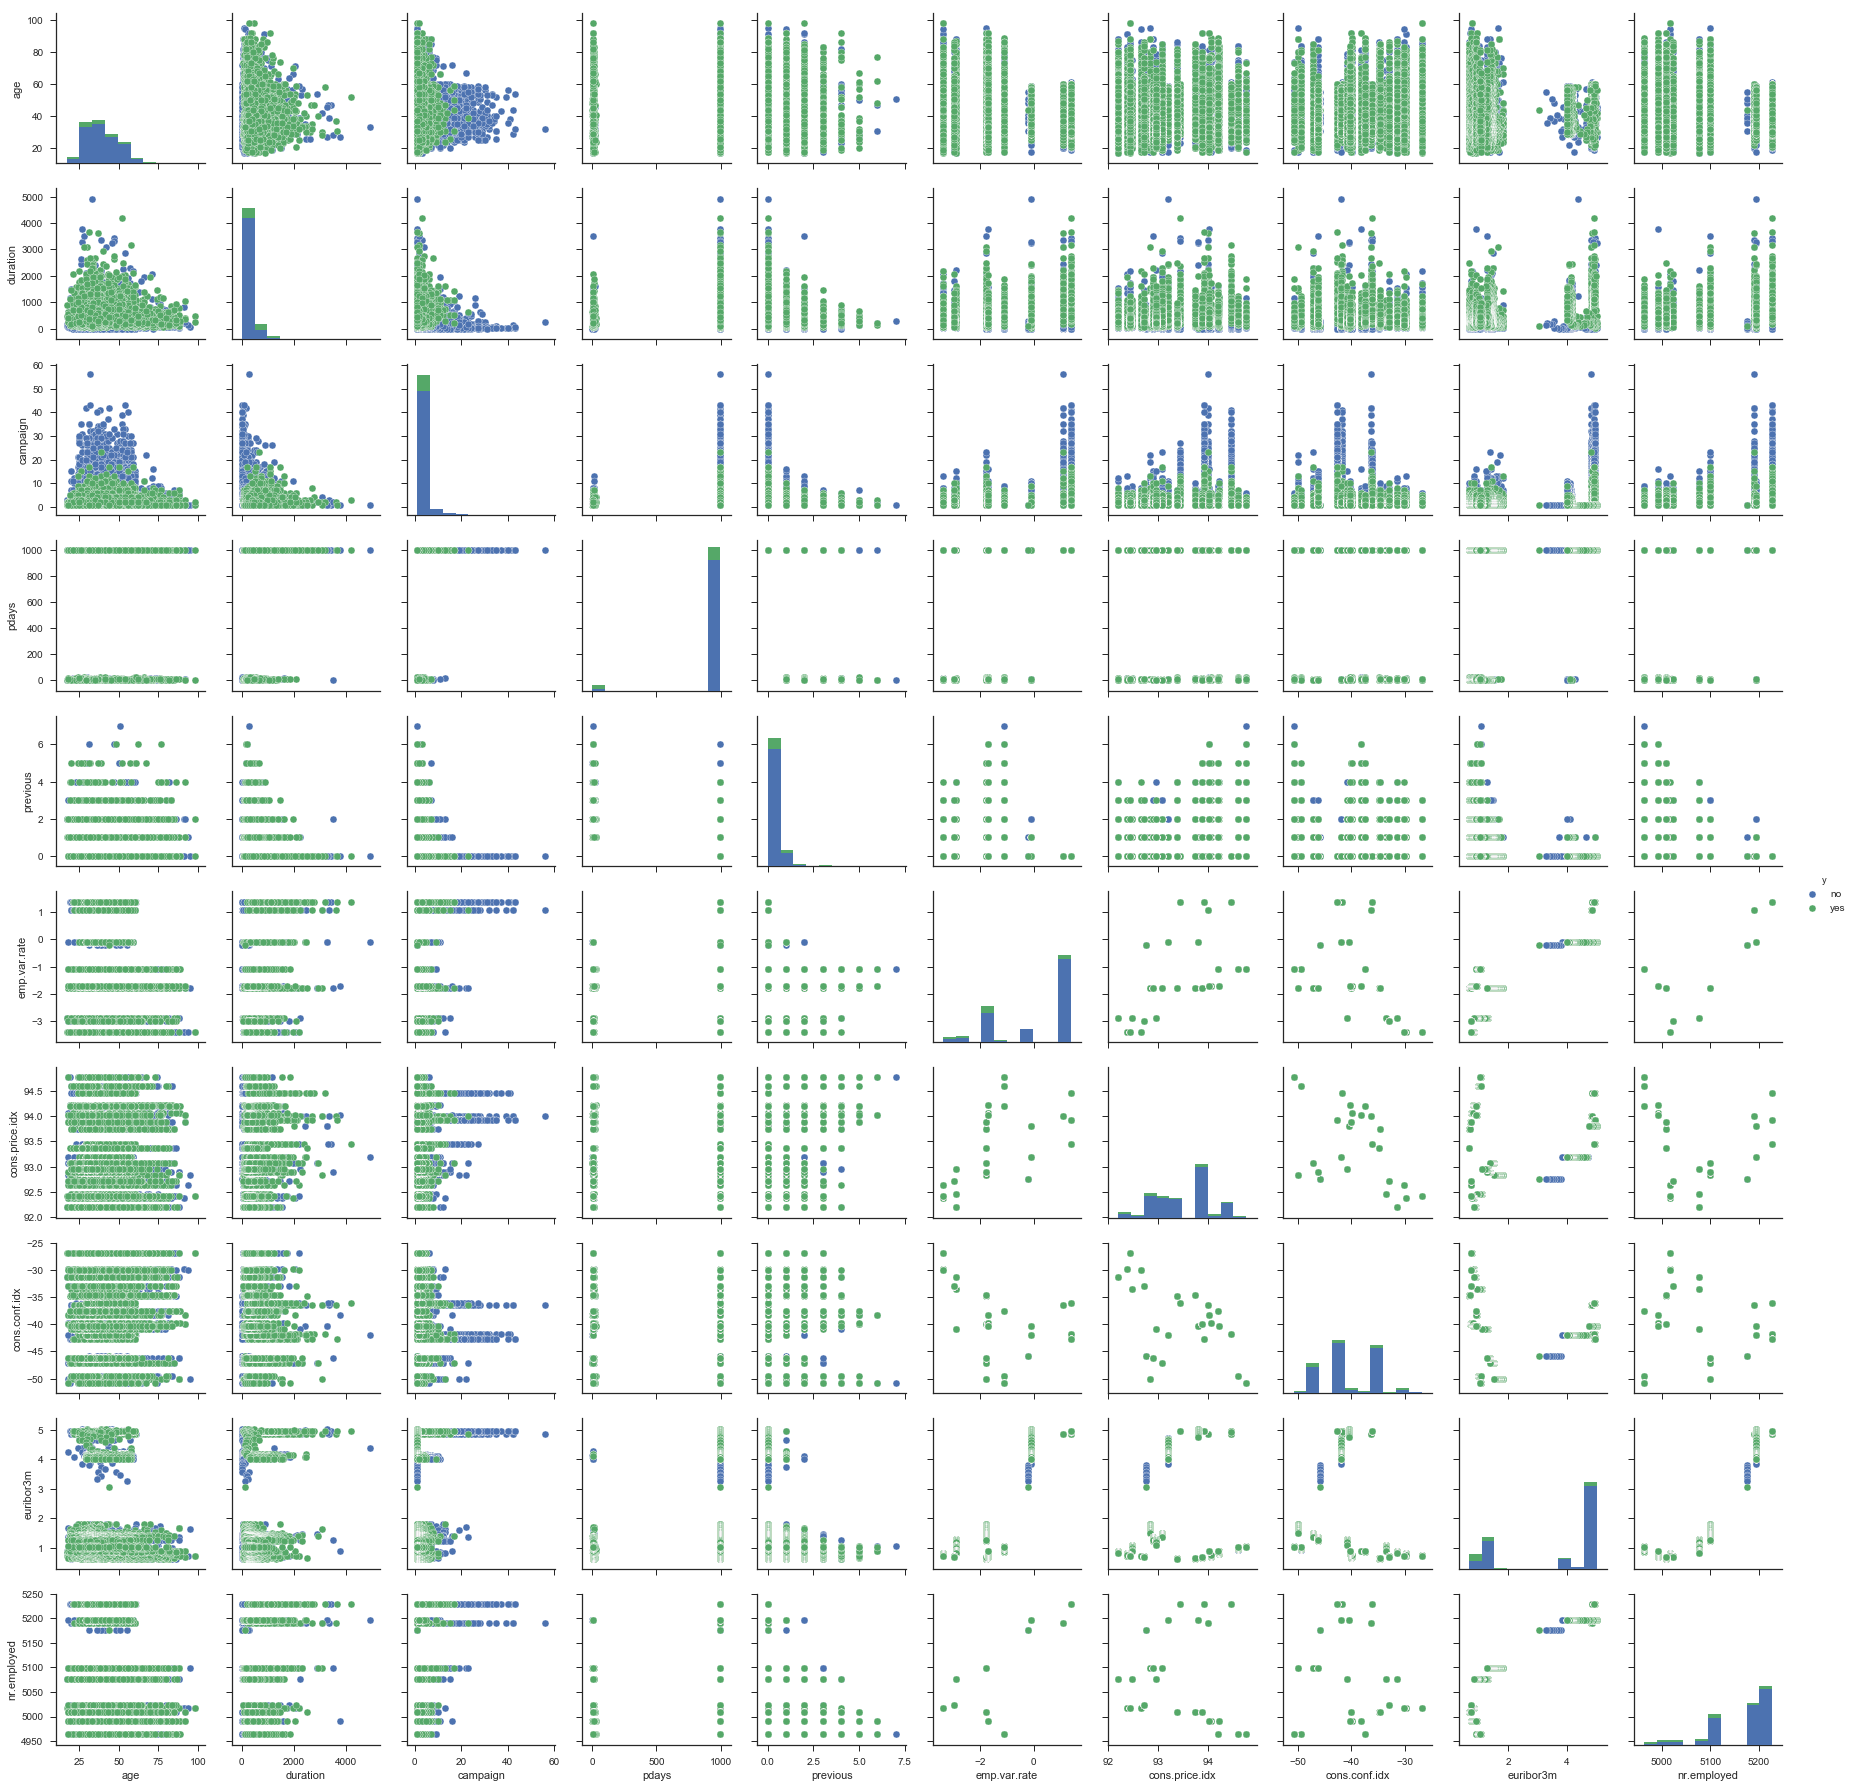

In [31]:
#pair plot between the given features
sns.pairplot(df, hue= 'y')
plt.show()

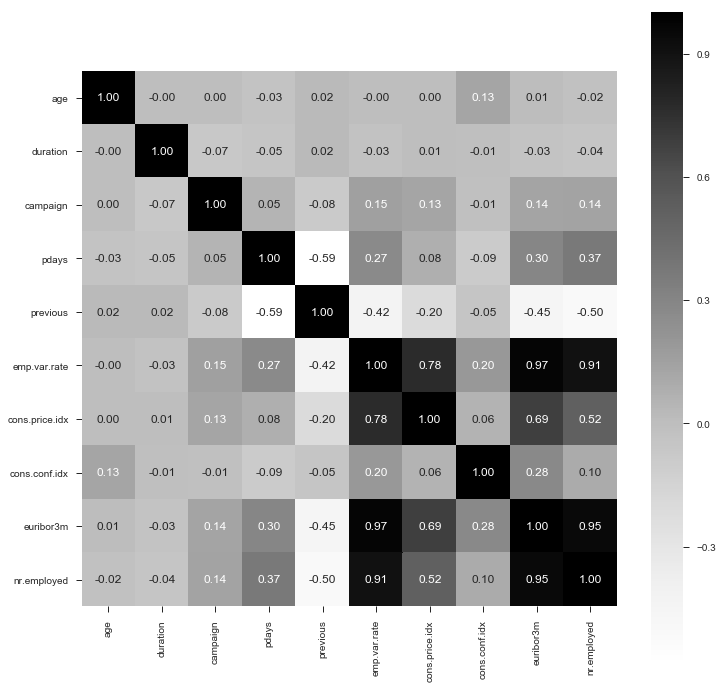

In [32]:
#Let check the correlation between the features using heatmap
plt.figure(figsize= (12, 12))
sns.heatmap(df.corr(), annot= True, fmt= '.2f', cmap= 'Greys', square= True)
plt.show()

In [33]:
#Here, previous feature is not showing efficient result because this features is negatively correlated with most of the features
#that make some sort of trouble in training the model.
#As per I studied in classification based problem we can only consider those features which are correlated with each other

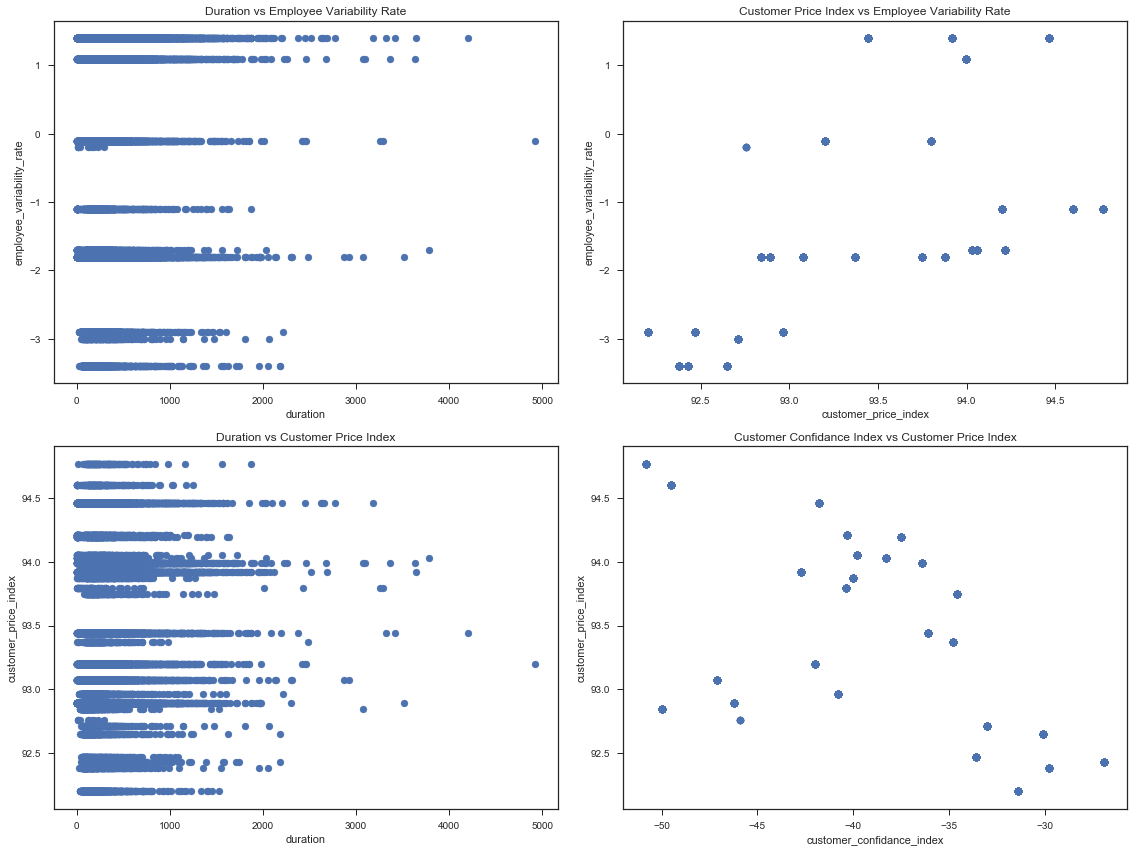

In [34]:
#duration vs employee variability rate
plt.figure(figsize= (16, 12))
plt.subplot(221)
plt.scatter(df['duration'], df['emp.var.rate'])
plt.xlabel('duration')
plt.ylabel('employee_variability_rate')
plt.title('Duration vs Employee Variability Rate')

plt.subplot(222)
plt.scatter(df['cons.price.idx'], df['emp.var.rate'])
plt.xlabel('customer_price_index')
plt.ylabel('employee_variability_rate')
plt.title('Customer Price Index vs Employee Variability Rate')

plt.subplot(223)
plt.scatter(df['duration'], df['cons.price.idx'])
plt.xlabel('duration')
plt.ylabel('customer_price_index')
plt.title('Duration vs Customer Price Index')

plt.subplot(224)
plt.scatter(df['cons.conf.idx'], df['cons.price.idx'])
plt.xlabel('customer_confidance_index')
plt.ylabel('customer_price_index')
plt.title('Customer Confidance Index vs Customer Price Index')

plt.tight_layout()
plt.show()

In [35]:
#The above graphs show the univariate, bivariate and multivariate analysis of the features.
#It shows how actually the features are dependent on the target feature
#Either they correlated or not correlated, usable or not usable each and every thing have been decribed by the above graphs.

In [36]:
#Now encoding the categorical features
mapping= {'yes': 1, 'no': 0, 'unknown': 2}
df['default']= df['default'].map(mapping)
df['housing']= df['housing'].map(mapping)
df['loan']= df['loan'].map(mapping)
df['y']= df['y'].map(mapping)
df['month']= df['month'].map({'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'oct': 10, 'nov': 11, 'dec': 12, 'mar': 3, 'apr': 4, 'sep': 9})
df['day_of_week']= df['day_of_week'].map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5})
df['poutcome']= df['poutcome'].map({'nonexistent': 2, 'failure': 0, 'success': 1})
df['education']= df['education'].map({'basic.4y': 1, 'high.school': 4, 'basic.6y': 2, 'basic.9y': 3,
       'professional.course': 6, 'unknown': 7, 'university.degree': 5,
       'illiterate': 0})

In [37]:
#For the rest I used to get dummies
df= pd.get_dummies(df)

In [38]:
#The question why does I used some of the features encoding using map function and some of them used to get dummies?
#I used the map function for those features which is ordinal in natures basically can say we easily define their priority by
#showing it and those which are nominal in natures I used dummies for them because how I don't how the priority is assigned to them.

In [39]:
df.head()

,age,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone
0,56,1,0,0,0,5,1,261,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,57,4,2,0,0,5,1,149,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,37,4,0,1,0,5,1,226,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,40,2,0,0,0,5,1,151,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,56,4,0,0,1,5,1,307,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [40]:
#Now the data is completely encoded

In [41]:
#The description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
education,41188.0,4.112120,1.568177,0.000,3.000,4.000,5.000,7.000
default,41188.0,0.417525,0.812813,0.000,0.000,0.000,0.000,2.000
housing,41188.0,0.571914,0.541209,0.000,0.000,1.000,1.000,2.000
loan,41188.0,0.199767,0.456002,0.000,0.000,0.000,0.000,2.000
month,41188.0,6.607896,2.040998,3.000,5.000,6.000,8.000,12.000
day_of_week,41188.0,2.979581,1.411514,1.000,2.000,3.000,4.000,5.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000


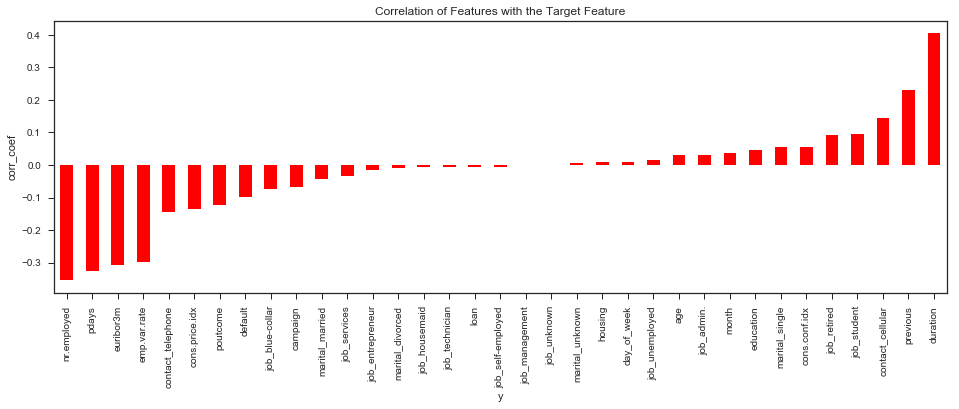

In [42]:
corr= df.corr()
corr_y= corr['y']
corr_y.drop(corr_y[corr_y.index== 'y'].index).sort_values().plot(kind= 'bar', figsize= (16, 5), color= 'red')
plt.title('Correlation of Features with the Target Feature')
plt.xlabel('y')
plt.ylabel('corr_coef')
plt.xticks(rotation= 90)
plt.show()

In [43]:
#The above graph shows how the target features are correlated with the others features
#From the graph I can clearly say that those features which are not correlated with the target have to remove but the factor
#those which are not correlated with the target but have correlation with the other features as well
#So, the basic funda is to consider all of them and check the rest using statistical and ml method and then remove.

In [44]:
#Let check the some statistical method to know the best categorical features
from sklearn.feature_selection import chi2, f_classif, RFE, mutual_info_classif, SelectKBest

In [45]:
#Chi-Square test- as statistical which is used to get the fetures information of the categorical features
#which one is important or not, according to their scores
chi_sq_test= chi2(df[['education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome',
                      'job_admin.', 'job_blue-collar', 'job_entrepreneur',
                      'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
                      'job_services', 'job_student', 'job_technician', 'job_unemployed',
                      'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
                      'marital_unknown', 'contact_cellular', 'contact_telephone']], df['y'])

In [46]:
chi_kbest= SelectKBest(chi_sq_test, k= 20)

In [47]:
chi_kbest_df= pd.DataFrame()
chi_kbest_df['features']= ['education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome',
                      'job_admin.', 'job_blue-collar', 'job_entrepreneur',
                      'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
                      'job_services', 'job_student', 'job_technician', 'job_unemployed',
                      'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
                      'marital_unknown', 'contact_cellular', 'contact_telephone']
chi_kbest_df['chi_stats']= chi_kbest.score_func[0]
chi_kbest_df['chi_pvalues']= chi_kbest.score_func[1]

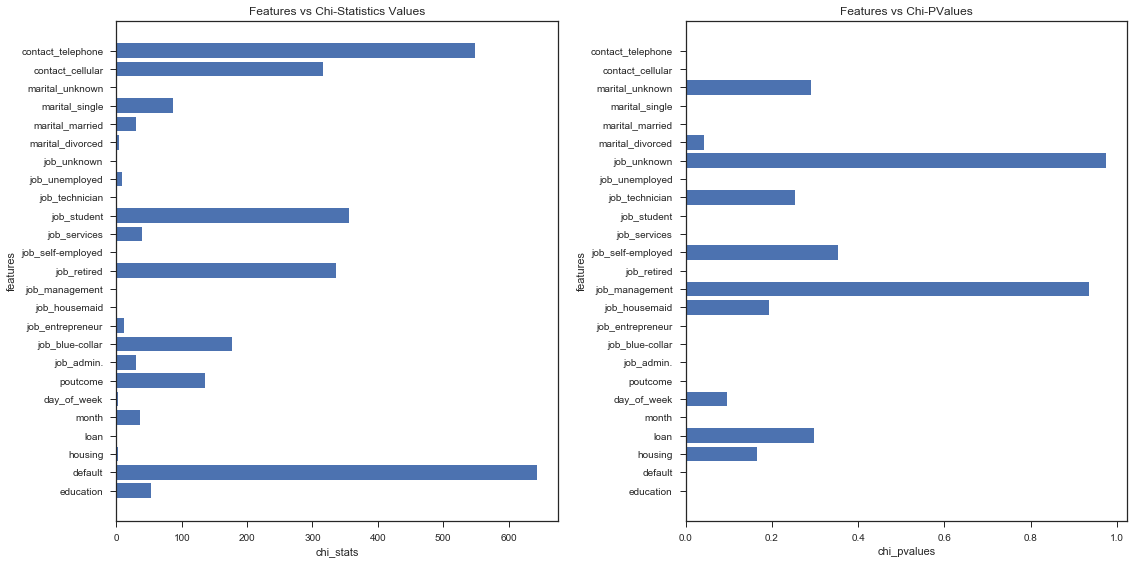

In [48]:
plt.figure(figsize= (16, 8))
plt.subplot(121)
plt.barh(chi_kbest_df['features'], chi_kbest_df['chi_stats'])
plt.xlabel('chi_stats')
plt.ylabel('features')
plt.title('Features vs Chi-Statistics Values')

plt.subplot(122)
plt.barh(chi_kbest_df['features'], chi_kbest_df['chi_pvalues'])
plt.xlabel('chi_pvalues')
plt.ylabel('features')
plt.title('Features vs Chi-PValues')

plt.tight_layout()
plt.show()

In [49]:
f_classif_test= f_classif(df.drop(['y'], axis= 1), df['y'])

In [50]:
f_classif_kbest= SelectKBest(f_classif_test)

In [51]:
f_classif_kbest_df= pd.DataFrame()
cols_used= df.columns.values.tolist()
cols_used.remove('y')
f_classif_kbest_df['features']= cols_used
f_classif_kbest_df['f_classif_stats']= f_classif_kbest.score_func[0]
f_classif_kbest_df['f_classif_pvalues']= f_classif_kbest.score_func[1]

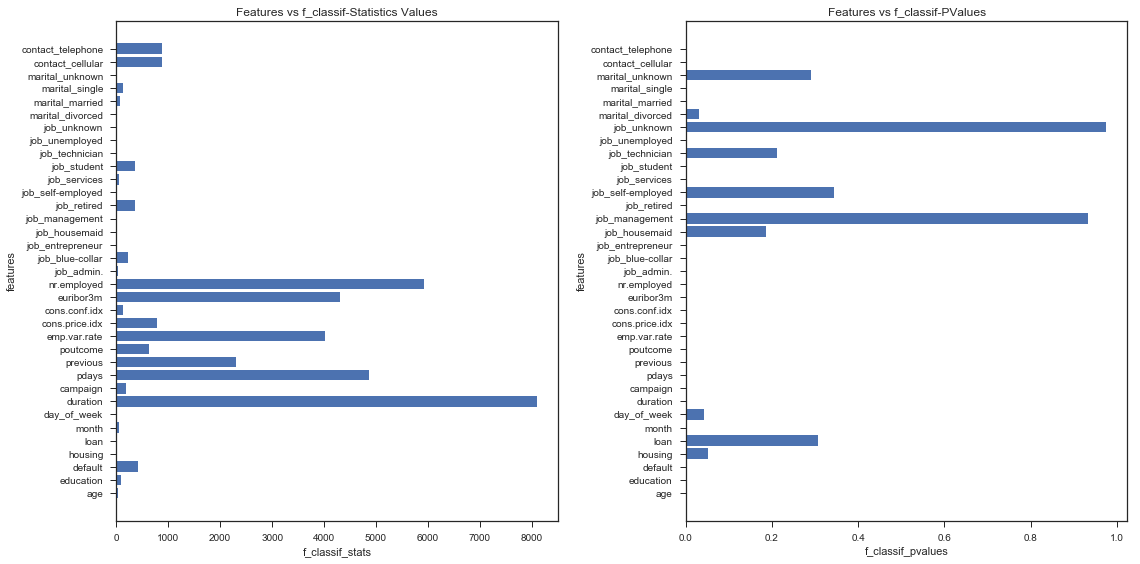

In [52]:
plt.figure(figsize= (16, 8))
plt.subplot(121)
plt.barh(f_classif_kbest_df['features'], f_classif_kbest_df['f_classif_stats'])
plt.xlabel('f_classif_stats')
plt.ylabel('features')
plt.title('Features vs f_classif-Statistics Values')

plt.subplot(122)
plt.barh(f_classif_kbest_df['features'], f_classif_kbest_df['f_classif_pvalues'])
plt.xlabel('f_classif_pvalues')
plt.ylabel('features')
plt.title('Features vs f_classif-PValues')

plt.tight_layout()
plt.show()

In [53]:
#Now here, I'm going to use the ExtraTreeClassifier model to check the features importances as well as 
#get important features using RFE
from sklearn.ensemble import ExtraTreesClassifier

In [54]:
clf_etc= ExtraTreesClassifier(random_state= 101) #used as baseline model (not tuned)
clf_etc.fit(df.drop(['y'], axis= 1), df['y'])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [55]:
clf_etc.score(df.drop(['y'], axis= 1), df['y'])

1.0

In [56]:
prediction= clf_etc.predict(df.drop(['y'], axis= 1))

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(df['y'], prediction)

1.0

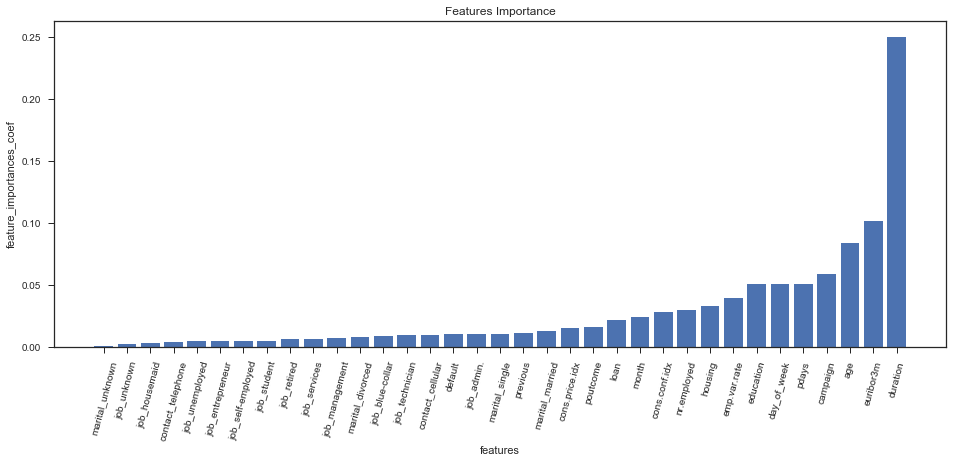

In [59]:
#Score is pretty good now check out the features importances
plt.figure(figsize= (16, 6))
feat_imp_df= pd.DataFrame()
feat_imp_df['features']= cols_used
feat_imp_df['feat_imp']= clf_etc.feature_importances_
feat_imp_df= feat_imp_df.sort_values(by= 'feat_imp')

plt.bar(feat_imp_df['features'], feat_imp_df['feat_imp'])
plt.xlabel('features')
plt.ylabel('feature_importances_coef')
plt.title('Features Importance')
plt.xticks(rotation= 75)
plt.show()

In [60]:
rfe_etc= RFE(clf_etc, n_features_to_select= 15, step= 0.7)
rfe_etc.fit(df.drop(['y'], axis= 1), df['y'])

RFE(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=101, verbose=0, warm_start=False),
  n_features_to_select=15, step=0.7, verbose=0)

In [61]:
predict_rfe= rfe_etc.predict(X= df.drop(['y'], axis= 1))

In [62]:
accuracy_score(df['y'], predict_rfe)

0.9999757210838108

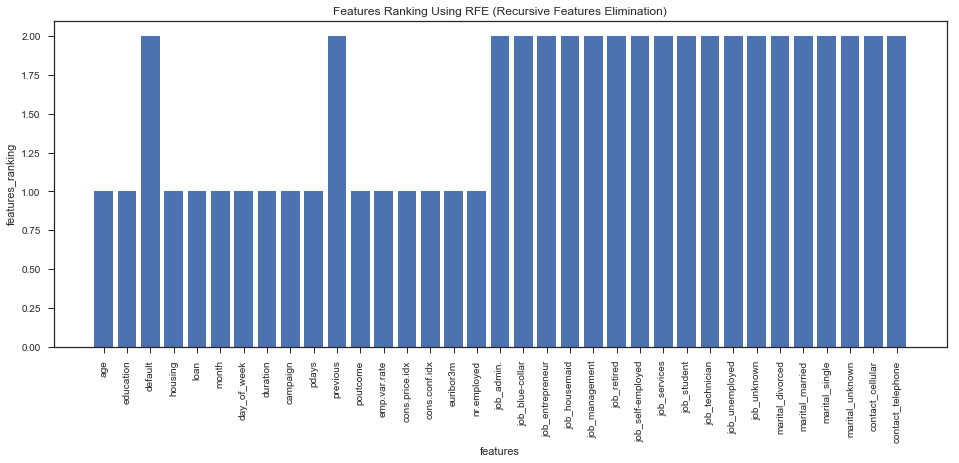

In [63]:
rfe_etc_df= pd.DataFrame()
rfe_etc_df['features']= cols_used
rfe_etc_df['ranking']= rfe_etc.ranking_

plt.figure(figsize= (16, 6))
plt.bar(rfe_etc_df['features'], rfe_etc_df['ranking'])
plt.xlabel('features')
plt.ylabel('features_ranking')
plt.title('Features Ranking Using RFE (Recursive Features Elimination)', size= 12)
plt.xticks(rotation= 90)
plt.show()

In [64]:
#Now I'm going to check from which statistical method I got the best features on basis of ROC_AUC_SCORE (data is imbalanced)

In [65]:
#Spot check model 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix

import xgboost as xgb
import catboost as cb
import lightgbm as lgbm

In [66]:
models= [
    ('LogisticRegression', LogisticRegression(class_weight= 'balanced', random_state= 101)),
    ('RidgeClassifier', RidgeClassifier(alpha= 0.001, class_weight= 'balanced', random_state= 101)),
    ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state= 101)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('RandomForestClassifier', RandomForestClassifier(class_weight= 'balanced', random_state= 101)),
    ('ExtraTreesClassifier', ExtraTreesClassifier(class_weight= 'balanced', random_state= 101)),
    ('XgboostClassifier', xgb.XGBClassifier(random_state= 101)),
    ('LighgbmClassifier', lgbm.LGBMClassifier(random_state= 101))
]

In [67]:
#Function for the spot checking of the model
def spot_check_model(models, train, target):
    roc_= {}
    #splitted the data in 80:20 ratio
    X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.2, random_state= 101)
    
    kfold= KFold(n_splits= 7, shuffle= True, random_state= 101)
    
    for model in models:
        score_cross_val= cross_val_score(model[1], X_train, y_train, n_jobs= 4, cv= kfold, scoring= 'roc_auc')
        
        model[1].fit(X_train, y_train)
        prediction= model[1].predict(X_test)
        
        train_acc= model[1].score(X_train, y_train)
        test_acc= accuracy_score(y_test, prediction)
        roc= roc_auc_score(y_test, prediction)
        f1= f1_score(y_test, prediction)
        roc_[model[0]]= roc
        
        print('Using Model {}' .format(model[0]))
        print('----------------------------------------------------------------------------')
        print('Cross Val Score: {:.2f}' .format(np.mean(score_cross_val)))
        print('Training Accuracy: {:.2f}' .format(train_acc))
        print('Validating Accuracy: {:.2f}' .format(test_acc))
        print('ROC AUC Score: {:.2f}' .format(roc))
        print('f1_Score: {:.2f}' .format(f1))
    
    return roc_

In [68]:
print('Using all the faetures')
print('Spot Checking...')
print()
all_feat_roc= spot_check_model(models, df.drop(['y'], axis= 1), df['y'])

Using all the faetures
Spot Checking...

Using Model LogisticRegression
----------------------------------------------------------------------------
Cross Val Score: 0.93
Training Accuracy: 0.86
Validating Accuracy: 0.86
ROC AUC Score: 0.86
f1_Score: 0.58
Using Model RidgeClassifier
----------------------------------------------------------------------------
Cross Val Score: 0.93
Training Accuracy: 0.86
Validating Accuracy: 0.86
ROC AUC Score: 0.84
f1_Score: 0.58
Using Model LinearDiscriminantAnalysis
----------------------------------------------------------------------------
Cross Val Score: 0.92
Training Accuracy: 0.91
Validating Accuracy: 0.91
ROC AUC Score: 0.73
f1_Score: 0.56
Using Model DecisionTreeClassifier
----------------------------------------------------------------------------
Cross Val Score: 0.73
Training Accuracy: 1.00
Validating Accuracy: 0.88
ROC AUC Score: 0.72
f1_Score: 0.51
Using Model KNeighborsClassifier
---------------------------------------------------------

C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Using Model XgboostClassifier
----------------------------------------------------------------------------
Cross Val Score: 0.95
Training Accuracy: 0.92
Validating Accuracy: 0.91
ROC AUC Score: 0.73
f1_Score: 0.56


C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Using Model LighgbmClassifier
----------------------------------------------------------------------------
Cross Val Score: 0.95
Training Accuracy: 0.94
Validating Accuracy: 0.92
ROC AUC Score: 0.77
f1_Score: 0.61


In [69]:
print('Using Features having Rank 1')
print('Spot Checking...')
print()
feat_use= rfe_etc_df[rfe_etc_df['ranking']==1]['features']
rank_1_feat_roc= spot_check_model(models, df[feat_use], df['y'])

Using Features having Rank 1
Spot Checking...

Using Model LogisticRegression
----------------------------------------------------------------------------
Cross Val Score: 0.93
Training Accuracy: 0.85
Validating Accuracy: 0.86
ROC AUC Score: 0.86
f1_Score: 0.58
Using Model RidgeClassifier
----------------------------------------------------------------------------
Cross Val Score: 0.92
Training Accuracy: 0.85
Validating Accuracy: 0.85
ROC AUC Score: 0.84
f1_Score: 0.57
Using Model LinearDiscriminantAnalysis
----------------------------------------------------------------------------
Cross Val Score: 0.92
Training Accuracy: 0.91
Validating Accuracy: 0.91
ROC AUC Score: 0.72
f1_Score: 0.55
Using Model DecisionTreeClassifier
----------------------------------------------------------------------------
Cross Val Score: 0.72
Training Accuracy: 1.00
Validating Accuracy: 0.89
ROC AUC Score: 0.73
f1_Score: 0.51
Using Model KNeighborsClassifier
---------------------------------------------------

C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Using Model XgboostClassifier
----------------------------------------------------------------------------
Cross Val Score: 0.95
Training Accuracy: 0.92
Validating Accuracy: 0.91
ROC AUC Score: 0.73
f1_Score: 0.56
Using Model LighgbmClassifier
----------------------------------------------------------------------------
Cross Val Score: 0.95
Training Accuracy: 0.94
Validating Accuracy: 0.92
ROC AUC Score: 0.76
f1_Score: 0.60


C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [70]:
print('Using Features having greater f_classif_statistics Values and less pvalues')
print('Spot Checking...')
print()
feat_use= f_classif_kbest_df[f_classif_kbest_df['f_classif_pvalues']<0.05]['features']
g_f_classif_feat_roc= spot_check_model(models, df[feat_use], df['y'])

Using Features having greater f_classif_statistics Values and less pvalues
Spot Checking...

Using Model LogisticRegression
----------------------------------------------------------------------------
Cross Val Score: 0.93
Training Accuracy: 0.86
Validating Accuracy: 0.86
ROC AUC Score: 0.86
f1_Score: 0.58
Using Model RidgeClassifier
----------------------------------------------------------------------------
Cross Val Score: 0.93
Training Accuracy: 0.86
Validating Accuracy: 0.86
ROC AUC Score: 0.84
f1_Score: 0.58
Using Model LinearDiscriminantAnalysis
----------------------------------------------------------------------------
Cross Val Score: 0.92
Training Accuracy: 0.91
Validating Accuracy: 0.91
ROC AUC Score: 0.73
f1_Score: 0.56
Using Model DecisionTreeClassifier
----------------------------------------------------------------------------
Cross Val Score: 0.73
Training Accuracy: 1.00
Validating Accuracy: 0.89
ROC AUC Score: 0.73
f1_Score: 0.51
Using Model KNeighborsClassifier
-----

C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Using Model XgboostClassifier
----------------------------------------------------------------------------
Cross Val Score: 0.95
Training Accuracy: 0.92
Validating Accuracy: 0.91
ROC AUC Score: 0.73
f1_Score: 0.56


C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Using Model LighgbmClassifier
----------------------------------------------------------------------------
Cross Val Score: 0.95
Training Accuracy: 0.94
Validating Accuracy: 0.92
ROC AUC Score: 0.76
f1_Score: 0.61


C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [72]:
#Although the Logistic Regression Algo performed well 
#Now time to tunning the algorithms
#Basically, here you see the models performs same either you use the selected features using different statistical
#methods or directly choose the all the features 
#So, here, I'm going to use all the features in place of selecting the particulars 
#As you saw after the logistic regressio and ridge regression the LightGBM model performed well in camparison
#to the f1_score
#So, I have to tune the LightGBM algorithm and use the catboost algo for the sake of getting better accuracy.

In [71]:
def run_CB(train, target):
    
    categorical_indices= np.where(train.dtypes!= np.float)[0]
    
    X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.20, random_state= 101)
    
    param_cb= {}
    #param_cb['iterations']= 1701
    #param_cb['learning_rate']= 0.1
    #param_cb['max_depth']= 3
    #param_cb['logging_level']= 'Silent'
    #param_cb['random_seed']= 2018
    #param_cb['one_hot_max_size']= 5
    #param_cb['eval_metric']= 'AUC'
    model= cb.CatBoostClassifier(**param_cb)

    #fit the data into the model
    model.fit(X_train, y_train, categorical_indices, eval_set= (X_test, y_test), early_stopping_rounds= 50, verbose= 100)
    prediction= model.predict(X_test)
    prediction_1= model.predict_proba(X_test)[::,1]
    
    #prediction_2= model.predict(test)

    #accuracy
    print('Training accuracy: {:.4f}' .format(model.score(X_train, y_train)))
    print('Testing accuracy: {:.4f}' .format(accuracy_score(y_test, prediction)))
    print('f1 score: {}' .format(f1_score(y_test, prediction)))
    print('ROC AUC: {}' .format(roc_auc_score(y_test, prediction)))
    
    cm= confusion_matrix(y_test, prediction)
    
    print('Confusion Matrix: ')
    print(cm)
    print('Classification Report: ')
    print(classification_report(y_test, prediction))
    
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)

    print('True Positive Rate: {}' .format(TPR))
    print('True Negative Rate: {}' .format(TNR))
    print('False Positive Rate: {}' .format(FPR))
    print('False Negative Rate: {}' .format(FNR))
    print('Overall Accuracy: {}' .format(ACC))

In [72]:
run_CB(df.drop(['y'], axis= 1), df['y'])

Learning rate set to 0.112623
0:	learn: 0.5857240	test: 0.5861777	best: 0.5861777 (0)	total: 504ms	remaining: 8m 23s
100:	learn: 0.1735373	test: 0.1910477	best: 0.1910477 (100)	total: 30.1s	remaining: 4m 28s
200:	learn: 0.1641442	test: 0.1894634	best: 0.1894316 (170)	total: 1m 2s	remaining: 4m 7s
300:	learn: 0.1571902	test: 0.1892595	best: 0.1892584 (298)	total: 1m 34s	remaining: 3m 38s
400:	learn: 0.1517276	test: 0.1890647	best: 0.1889090 (396)	total: 2m 5s	remaining: 3m 8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1889089936
bestIteration = 396

Shrink model to first 397 iterations.
Training accuracy: 0.9299
Testing accuracy: 0.9111
f1 score: 0.5627240143369175
ROC AUC: 0.7288077562820523
Confusion Matrix: 
[[7035  244]
 [ 488  471]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      7279
          1       0.66      0.49      0.56       959

avg / total       0.90      0.91      0.91 

In [85]:
#With hyperparameters
def run_CB(train, target):
    
    categorical_indices= np.where(train.dtypes!= np.float)[0]
    
    X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.20, random_state= 2018)
    
    param_cb= {}
    param_cb['iterations']= 1701
    param_cb['learning_rate']= 0.1
    param_cb['max_depth']= 3
    param_cb['logging_level']= 'Silent'
    param_cb['random_seed']= 2018
    #param_cb['one_hot_max_size']= 5
    #param_cb['eval_metric']= 'AUC'
    model= cb.CatBoostClassifier(**param_cb)

    #fit the data into the model
    model.fit(X_train, y_train, categorical_indices, eval_set= (X_test, y_test), early_stopping_rounds= 50, verbose= 100)
    prediction= model.predict(X_test)
    prediction_1= model.predict_proba(X_test)[::,1]
    
    #prediction_2= model.predict(test)

    #accuracy
    print('Training accuracy: {:.4f}' .format(model.score(X_train, y_train)))
    print('Testing accuracy: {:.4f}' .format(accuracy_score(y_test, prediction)))
    print('f1 score: {}' .format(f1_score(y_test, prediction)))
    print('ROC AUC: {}' .format(roc_auc_score(y_test, prediction)))
    
    cm= confusion_matrix(y_test, prediction)
    
    print('Confusion Matrix: ')
    print(cm)
    print('Classification Report: ')
    print(classification_report(y_test, prediction))
    
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)

    print('True Positive Rate: {}' .format(TPR))
    print('True Negative Rate: {}' .format(TNR))
    print('False Positive Rate: {}' .format(FPR))
    print('False Negative Rate: {}' .format(FNR))
    print('Overall Accuracy: {}' .format(ACC))

In [86]:
run_CB(df.drop(['y'], axis= 1), df['y'])

0:	learn: 0.5988183	test: 0.5978295	best: 0.5978295 (0)	total: 118ms	remaining: 3m 20s
100:	learn: 0.1871471	test: 0.1911597	best: 0.1911520 (98)	total: 13s	remaining: 3m 25s
200:	learn: 0.1808651	test: 0.1870454	best: 0.1870454 (200)	total: 26.9s	remaining: 3m 20s
300:	learn: 0.1783548	test: 0.1855768	best: 0.1855768 (299)	total: 40s	remaining: 3m 6s
400:	learn: 0.1766759	test: 0.1852701	best: 0.1851805 (358)	total: 53.6s	remaining: 2m 53s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1851805208
bestIteration = 358

Shrink model to first 359 iterations.
Training accuracy: 0.9239
Testing accuracy: 0.9138
f1 score: 0.5279255319148937
ROC AUC: 0.7080835119490354
Confusion Matrix: 
[[7131  216]
 [ 494  397]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      7347
          1       0.65      0.45      0.53       891

avg / total       0.90      0.91      0.91      8238

True Positive Rate: 0.93

In [86]:
#Basically, here the tuned model not performed well as comaprison to the simple baseline model

In [124]:
#Try using the LightGBM tuned model for that
def run_LGBM(train, target):
    params = {
        #'num_leaves' : 256,
        'learning_rate': 0.011, #0.011,
        #'metric':'auc',
        'objective':'binary',
        #'early_stopping_round': 40,
        'max_depth': 8,
        'colsample_bytree': 0.7,
        'bagging_fraction':0.5,
        'feature_fraction':0.6,
        'bagging_seed':101,
        #'feature_fraction_seed':2018,
        #'verbose' : 1,
        #'num_threads': 7,
        'seed': 101,
        'booster': 'gbdt',
        'max_delta_step': 17,
        #'is_unbalance': True,
        #'scale_pos_weight': np.round(target[target== 0].count()/target[target== 1].count())
        }
    
    X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.2, random_state= 101)
    
    dtrain= lgbm.Dataset(X_train, y_train)
    dtest= lgbm.Dataset(X_test, y_test)
    
    model= lgbm.train(params, dtrain, num_boost_round= 1701, valid_sets= [dtrain, dtest], 
                      valid_names= ['Train', 'Valid'], verbose_eval= 100, early_stopping_rounds= 50)
    
    prediction= model.predict(X_test)
    
    #prediction_2= model.predict(test)
    
    for i in range(len(prediction)):
        if prediction[i]<0.5:
            prediction[i]= 0
        else:
            prediction[i]= 1
            
    
    #accuracy
    print('Testing accuracy: {:.4f}' .format(accuracy_score(y_test, prediction)))
    print('f1 score: {}' .format(f1_score(y_test, prediction)))
    print('ROC AUC: {}' .format(roc_auc_score(y_test, prediction)))
    
    print('Confusion Matrix: ')
    cm= confusion_matrix(y_test, prediction)
    print(cm)
    print('Classification Report: ')
    print(classification_report(y_test, prediction))
    
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)

    print('True Positive Rate: {}' .format(TPR))
    print('True Negative Rate: {}' .format(TNR))
    print('False Positive Rate: {}' .format(FPR))
    print('False Negative Rate: {}' .format(FNR))
    print('Overall Accuracy: {}' .format(ACC))
    
    #plot the feature Importance
    lgbm.plot_importance(model, figsize= (16, 6))
    plt.show()
    
    result_df= pd.DataFrame()
    result_df['Actual']= y_test
    result_df['Predicted']= prediction
    
    result_df['Actual']= result_df['Actual'].map({0: 'no', 1: 'yes'})
    result_df['Predicted']= result_df['Predicted'].map({0: 'no', 1: 'yes'})
    
    return result_df

Training until validation scores don't improve for 50 rounds.
[100]	Train's binary_logloss: 0.307038	Valid's binary_logloss: 0.314183
[200]	Train's binary_logloss: 0.211709	Valid's binary_logloss: 0.222783
[300]	Train's binary_logloss: 0.179007	Valid's binary_logloss: 0.193229
[400]	Train's binary_logloss: 0.165176	Valid's binary_logloss: 0.182666
[500]	Train's binary_logloss: 0.157459	Valid's binary_logloss: 0.17826
[600]	Train's binary_logloss: 0.152542	Valid's binary_logloss: 0.176386
[700]	Train's binary_logloss: 0.149048	Valid's binary_logloss: 0.175648
[800]	Train's binary_logloss: 0.146077	Valid's binary_logloss: 0.175341
[900]	Train's binary_logloss: 0.143435	Valid's binary_logloss: 0.175249
Early stopping, best iteration is:
[892]	Train's binary_logloss: 0.143641	Valid's binary_logloss: 0.175228
Testing accuracy: 0.9170
f1 score: 0.6091428571428571
ROC AUC: 0.7601714246175916
Confusion Matrix: 
[[7021  258]
 [ 426  533]]
Classification Report: 
             precision    recall

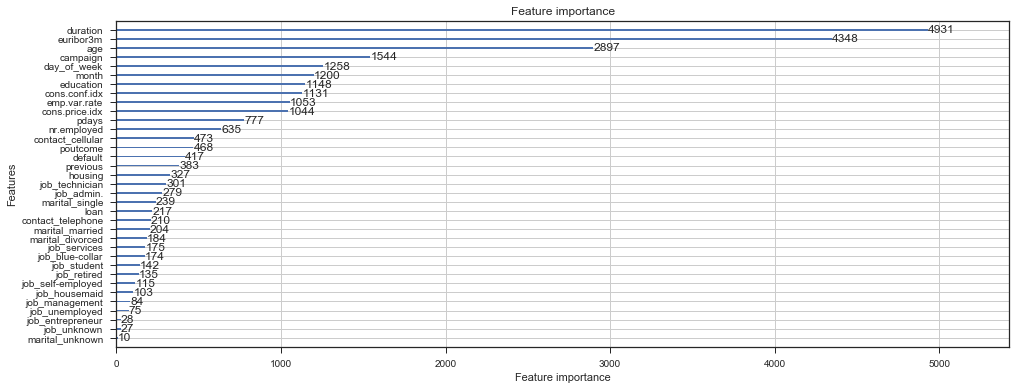

In [125]:
result_1= run_LGBM(df.drop(['y'], axis= 1), df['y'])

In [109]:
result_1['Actual'].value_counts(), result_1['Predicted'].value_counts()

(no     7279
 yes     959
 Name: Actual, dtype: int64, no     7447
 yes     791
 Name: Predicted, dtype: int64)

In [127]:
result_1.to_csv('predicted.csv', index= False)

In [89]:
def run_XGB(train, target):
    
    param_xgb= {}
    param_xgb['eda']= 0.01
    param_xgb['max_depth']= 3
    param_xgb['objective']= 'binary:logistic'
    #param_xgb['eval_metric']= 'auc'
    param_xgb['seed']= 101
    #param_xgb['scale_pos_weight']= target[target== 0].count()/target[target== 1].count()
    param_xgb['max_delta_step']= 7
    
    #split the data in trainig and validating form
    X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.2, random_state= 101)
    #prepare data for the training
    dtrain= xgb.DMatrix(X_train, y_train)
    dtest= xgb.DMatrix(X_test, y_test)
    #dtest_1= xgb.DMatrix(test)
    
    watchlist= [(dtrain, 'train'), (dtest, 'eval')]
    
    model= xgb.train(param_xgb, dtrain, num_boost_round= 101, evals= watchlist, verbose_eval= 100, early_stopping_rounds= 50)
    
    #do prediction
    prediction= model.predict(dtest)
    prediction_1= prediction.copy()

    #prediction_2= model.predict(dtest_1)
    
    for i in range(len(prediction)):
        if prediction[i]<0.5:
            prediction[i]= 0
        else:
            prediction[i]= 1
    
    #accuracy
    print('Testing accuracy: {:.4f}' .format(accuracy_score(y_test, prediction)))
    #print('f1 score: {}' .format(f1_score(y_test, prediction)))
    print('ROC AUC: {}' .format(roc_auc_score(y_test, prediction)))
    
    print('Confusion Matrix: ')
    cm= confusion_matrix(y_test, prediction)
    print(cm)
    print('Classification Report: ')
    print(classification_report(y_test, prediction))
    
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)

    print('True Positive Rate: {}' .format(TPR))
    print('True Negative Rate: {}' .format(TNR))
    print('False Positive Rate: {}' .format(FPR))
    print('False Negative Rate: {}' .format(FNR))
    print('Overall Accuracy: {}' .format(ACC))
    
    #plot the feature Importance
    xgb.plot_importance(model)
    plt.show()

[0]	train-error:0.090835	eval-error:0.096383
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 50 rounds.
[100]	train-error:0.070501	eval-error:0.086793
Testing accuracy: 0.9132
ROC AUC: 0.7476302406067363
Confusion Matrix: 
[[7013  266]
 [ 449  510]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      7279
          1       0.66      0.53      0.59       959

avg / total       0.91      0.91      0.91      8238

True Positive Rate: 0.9398284642187081
True Negative Rate: 0.6572164948453608
False Positive Rate: 0.3427835051546392
False Negative Rate: 0.06017153578129188
Overall Accuracy: 0.9132070890992959


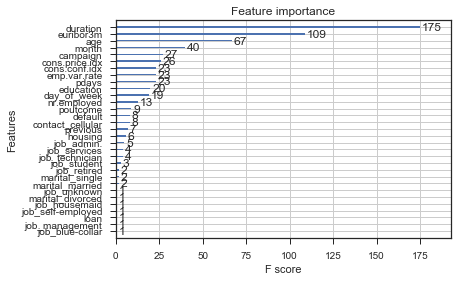

In [90]:
run_XGB(df.drop(['y'], axis= 1), df['y'])

In [114]:
#Overall the LightGBM model perfromed well as comparison to all of them